In [ ]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge
import statsmodels.api as sm

In [ ]:
# Load data
df = pd.read_csv('calorie.csv')

# **Preprocessing Data**

In [132]:
df.shape

(973, 15)

In [133]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
nulls = df.isna().sum().sum()
print(f"number of null values : {nulls}")

number of null values : 0


In [ ]:
duplicates = df[df.duplicated()]
print(f"number of duplicated rows : {len(duplicates)}")

number of duplicated rows : 0


## **Age**

In [ ]:
df['Age'].describe()

,Age
count,973.000000
mean,38.683453
std,12.180928
min,18.000000
25%,28.000000
50%,40.000000
75%,49.000000
max,59.000000


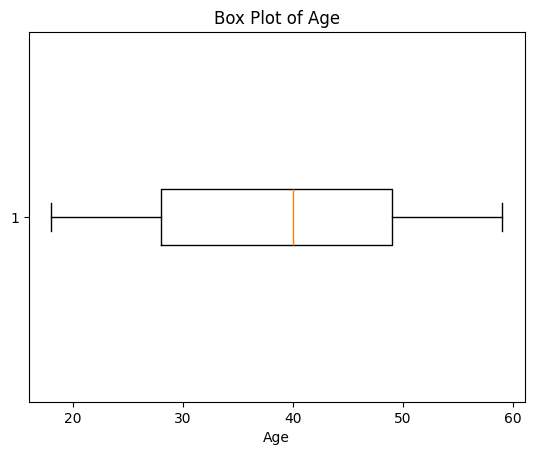

In [ ]:
# Box-plot of the age
plt.boxplot(df['Age'], vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

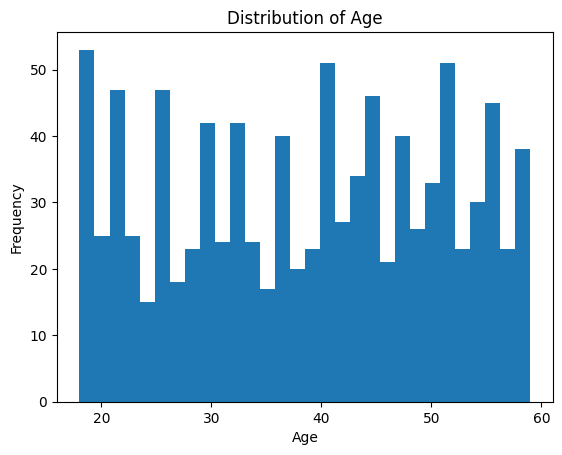

In [ ]:
# Distributon plot
plt.hist(df['Age'], bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaled_age = scaler.fit_transform(df[['Age']])

In [ ]:
# Add to Clean_Data
Clean_Data = pd.DataFrame(scaled_age, columns=['age'])

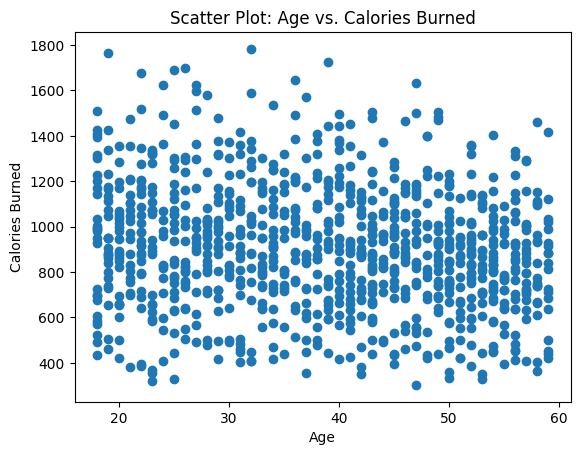

In [ ]:
# scatter plot vs target
plt.scatter(df['Age'], df['Calories_Burned'])
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.title('Scatter Plot: Age vs. Calories Burned')
plt.show()

## **Gender**

In [ ]:
df['Gender'].describe()

,Gender
count,973
unique,2
top,Male
freq,511


In [ ]:
df['Gender'].info()

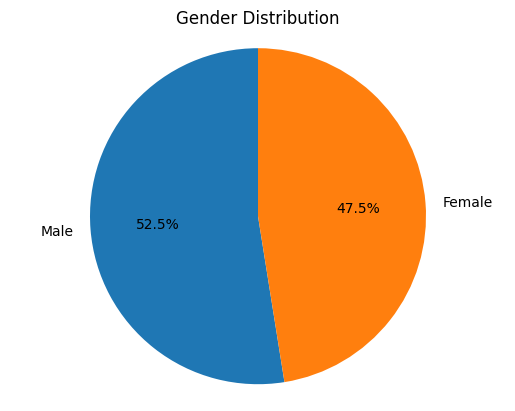

In [134]:
# Pie plot
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

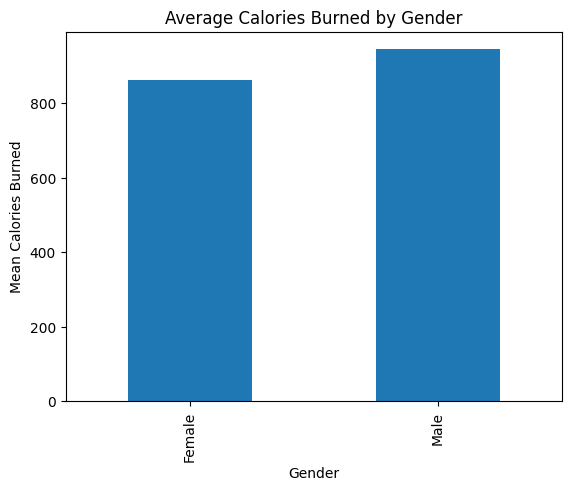

In [ ]:
# mean Calories_Burned of each category
mean_by_gender = df.groupby('Gender')['Calories_Burned'].mean()
mean_by_gender.plot(kind='bar')
plt.title('Average Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Calories Burned')
plt.show()

<ipython-input-18-8c01a1e665ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Calories_Burned', data=df, ax=axes[0], palette='pastel')
<ipython-input-18-8c01a1e665ee>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend().remove()


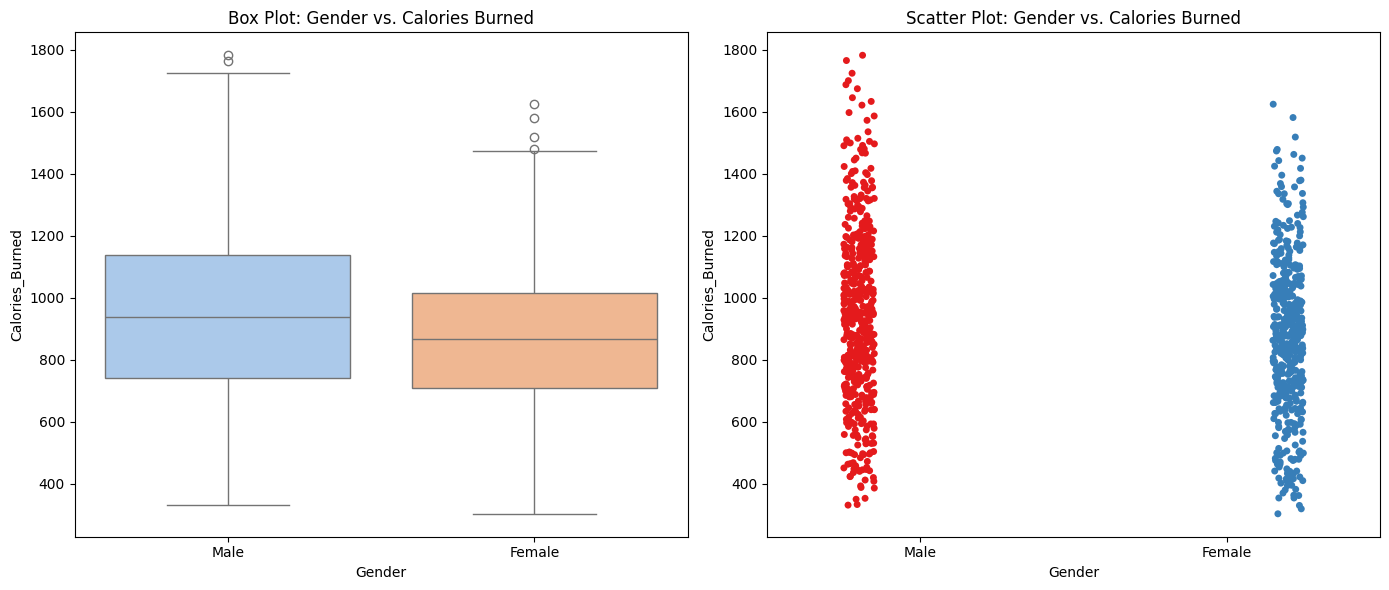

In [ ]:
# Scatter plot and box-plot vs target
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Gender', y='Calories_Burned', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Box Plot: Gender vs. Calories Burned')
sns.stripplot(x='Gender', y='Calories_Burned', data=df, ax=axes[1], hue='Gender', dodge=True, jitter=True, palette='Set1')
axes[1].set_title('Scatter Plot: Gender vs. Calories Burned')
axes[1].legend().remove()
plt.tight_layout()
plt.show()


In [ ]:
# Encoding
df['Gender_encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
# Add to Clean_Data
Clean_Data['gender'] = df['Gender_encoded']

## **Weight**

In [ ]:
# Rename the column :  Weight (kg) -> weight
df.rename(columns={'Weight (kg)': 'weight'}, inplace=True)

In [ ]:
df['weight'].describe()

,weight
count,973.000000
mean,73.854676
std,21.207500
min,40.000000
25%,58.100000
50%,70.000000
75%,86.000000
max,129.900000


In [ ]:
df['weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
973 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


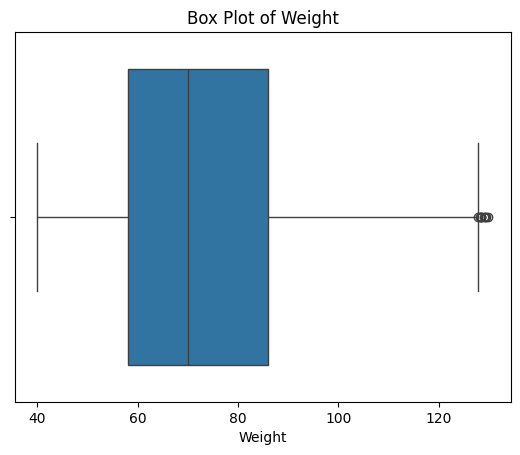

In [ ]:
# Box plot
sns.boxplot(x=df['weight'])
plt.title('Box Plot of Weight')
plt.xlabel('Weight')
plt.show()

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the max value within the non-outlier range
max_non_outlier = df['weight'][df['weight'] <= upper_bound].max()

# Replace outliers with that max value
df['weight'] = np.where(df['weight'] > upper_bound, max_non_outlier, df['weight'])

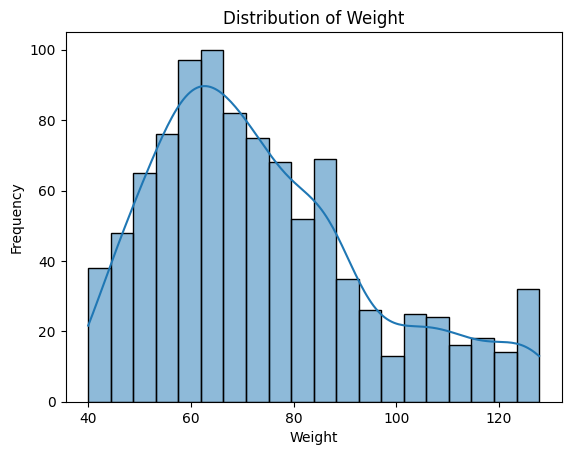

In [ ]:
# Hist plot
sns.histplot(df['weight'], bins=20, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

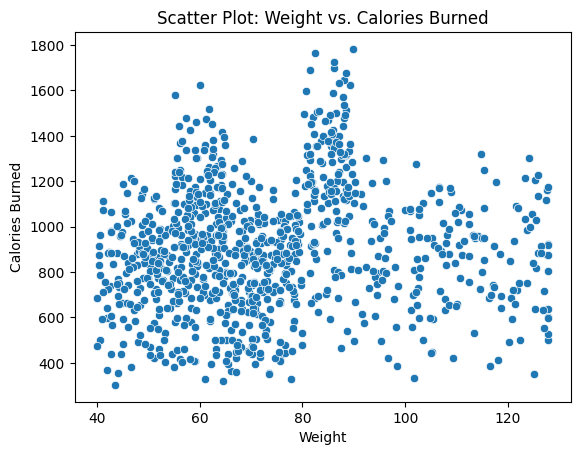

In [ ]:
# Scatter plot vs target
sns.scatterplot(x='weight', y='Calories_Burned', data=df)
plt.title('Scatter Plot: Weight vs. Calories Burned')
plt.xlabel('Weight')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# Scale feature
df['weight_scaled'] = scaler.fit_transform(df[['weight']])

In [ ]:
# Add to Clean_Data
Clean_Data['weight'] = df['weight_scaled']

## **Height**

In [ ]:
# Rename the column :  Height (m) -> height
df.rename(columns={'Height (m)': 'height'}, inplace=True)

In [ ]:
df['height'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: height
Non-Null Count  Dtype  
--------------  -----  
973 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [ ]:
df['height'].describe()

,height
count,973.00000
mean,1.72258
std,0.12772
min,1.50000
25%,1.62000
50%,1.71000
75%,1.80000
max,2.00000


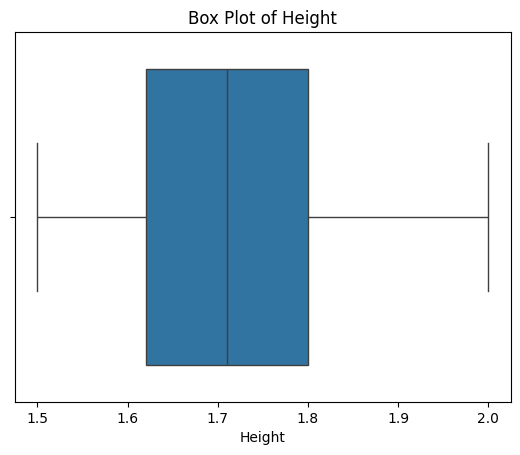

In [ ]:
# Box plot
sns.boxplot(x=df['height'])
plt.title('Box Plot of Height')
plt.xlabel('Height')
plt.show()

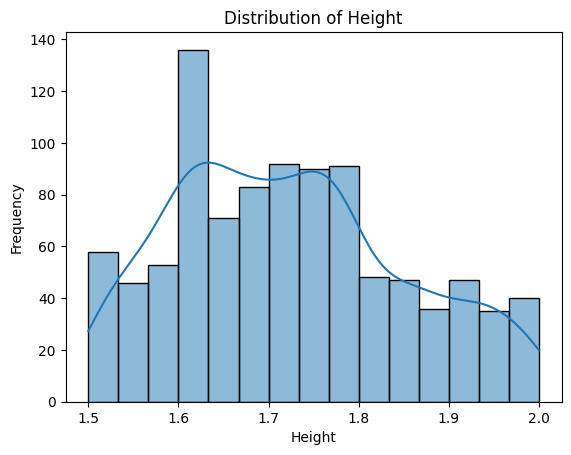

In [ ]:
# Hist plot
sns.histplot(df['height'], bins=15, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

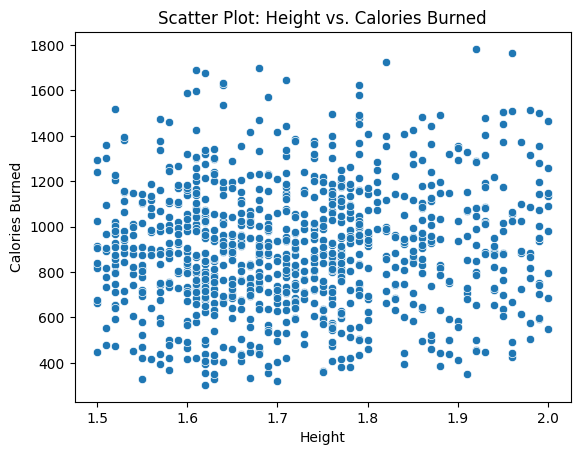

In [ ]:
# scatter plot vs target
sns.scatterplot(x='height', y='Calories_Burned', data=df)
plt.title('Scatter Plot: Height vs. Calories Burned')
plt.xlabel('Height')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# Scale feature
scaler = StandardScaler()
df['height_scaled'] = scaler.fit_transform(df[['height']])

In [ ]:
# Add to Clean_Data
Clean_Data['height'] = df['height_scaled']

## **Max_BPM**

In [ ]:
df['Max_BPM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Max_BPM
Non-Null Count  Dtype
--------------  -----
973 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


In [ ]:
df['Max_BPM'].describe()

,Max_BPM
count,973.000000
mean,179.883864
std,11.525686
min,160.000000
25%,170.000000
50%,180.000000
75%,190.000000
max,199.000000


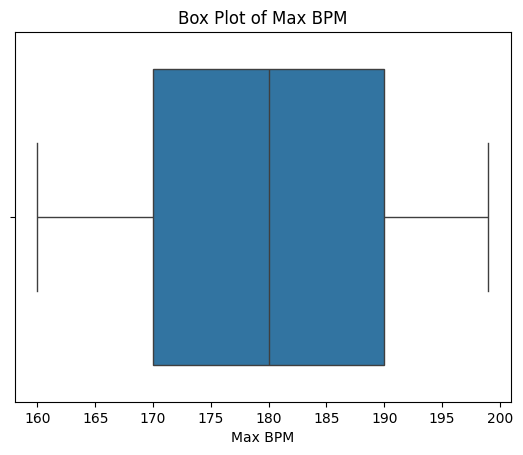

In [ ]:
# box plot
sns.boxplot(x=df['Max_BPM'])
plt.title('Box Plot of Max BPM')
plt.xlabel('Max BPM')
plt.show()

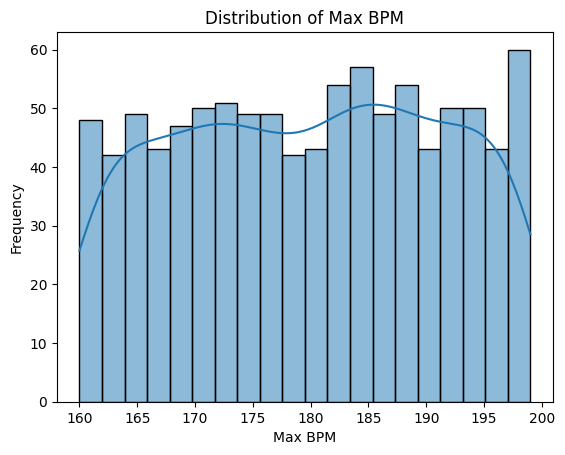

In [ ]:
# Hist plot
sns.histplot(df['Max_BPM'], bins=20, kde=True)
plt.title('Distribution of Max BPM')
plt.xlabel('Max BPM')
plt.ylabel('Frequency')
plt.show()

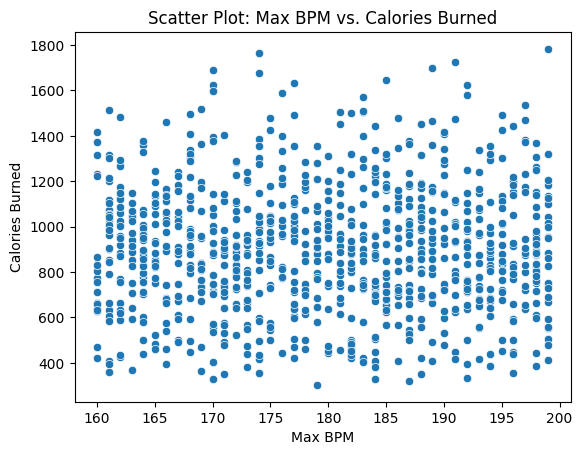

In [ ]:
# Scatter plot vs target
sns.scatterplot(x='Max_BPM', y='Calories_Burned', data=df)
plt.title('Scatter Plot: Max BPM vs. Calories Burned')
plt.xlabel('Max BPM')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# Scale feature
scaler = StandardScaler()
df['Max_BPM_scaled'] = scaler.fit_transform(df[['Max_BPM']])

In [ ]:
Clean_Data['max_bpm'] = df['Max_BPM_scaled']

## **Avg_BPM**

In [ ]:
df['Avg_BPM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Avg_BPM
Non-Null Count  Dtype
--------------  -----
973 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


In [ ]:
df['Avg_BPM'].describe()

,Avg_BPM
count,973.000000
mean,143.766701
std,14.345101
min,120.000000
25%,131.000000
50%,143.000000
75%,156.000000
max,169.000000


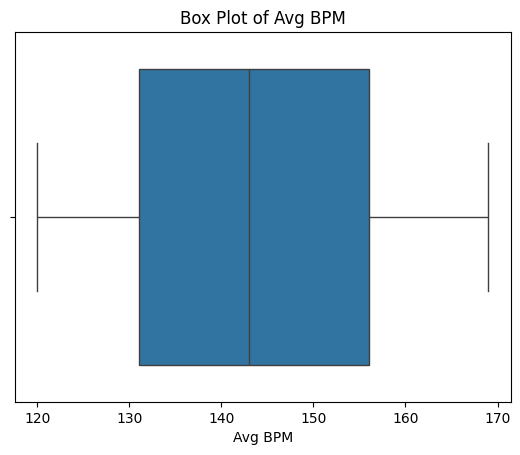

In [ ]:
# Box plot
sns.boxplot(x=df['Avg_BPM'])
plt.title('Box Plot of Avg BPM')
plt.xlabel('Avg BPM')
plt.show()

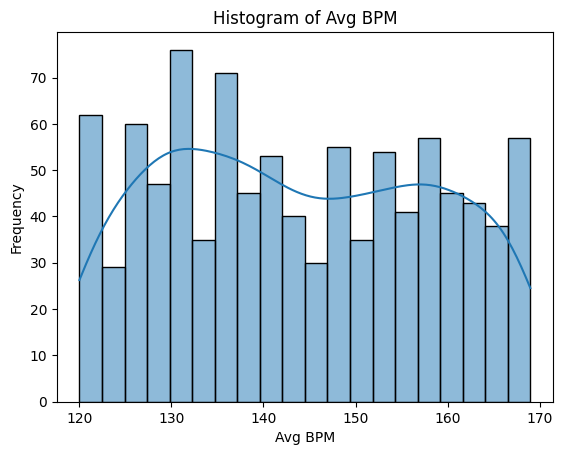

In [ ]:
# Hist plot
sns.histplot(df['Avg_BPM'], bins=20, kde=True)
plt.title('Histogram of Avg BPM')
plt.xlabel('Avg BPM')
plt.ylabel('Frequency')
plt.show()

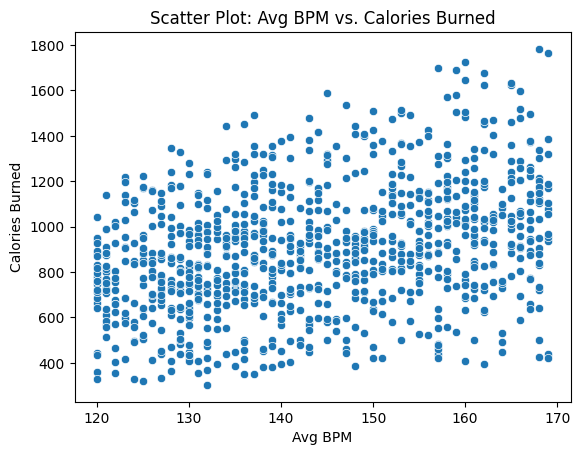

In [ ]:
# Scatter plot with target
sns.scatterplot(x='Avg_BPM', y='Calories_Burned', data=df)
plt.title('Scatter Plot: Avg BPM vs. Calories Burned')
plt.xlabel('Avg BPM')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# Scale feature
scaler = StandardScaler()
df['Avg_BPM_scaled'] = scaler.fit_transform(df[['Avg_BPM']])

In [ ]:
# Add to Clean_Data
Clean_Data['avg_bpm'] = df['Avg_BPM_scaled']

## **Resting_BPM**

In [ ]:
df['Resting_BPM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Resting_BPM
Non-Null Count  Dtype
--------------  -----
973 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


In [ ]:
df['Resting_BPM'].describe()

,Resting_BPM
count,973.000000
mean,62.223022
std,7.327060
min,50.000000
25%,56.000000
50%,62.000000
75%,68.000000
max,74.000000


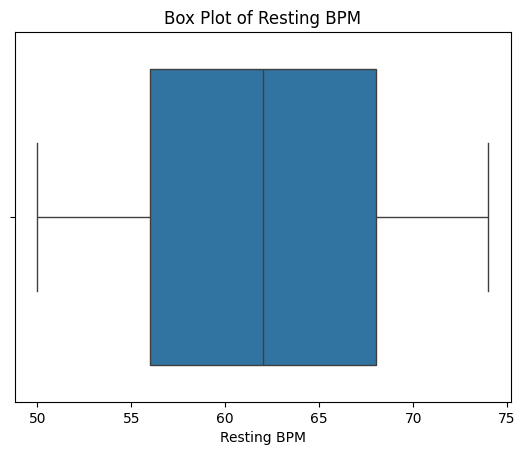

In [ ]:
# Box plot
sns.boxplot(x=df['Resting_BPM'])
plt.title('Box Plot of Resting BPM')
plt.xlabel('Resting BPM')
plt.show()

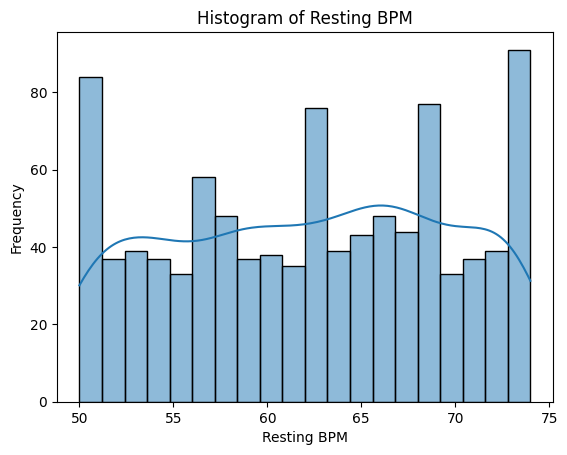

In [ ]:
# Hist plot
sns.histplot(df['Resting_BPM'], bins=20, kde=True)
plt.title('Histogram of Resting BPM')
plt.xlabel('Resting BPM')
plt.ylabel('Frequency')
plt.show()

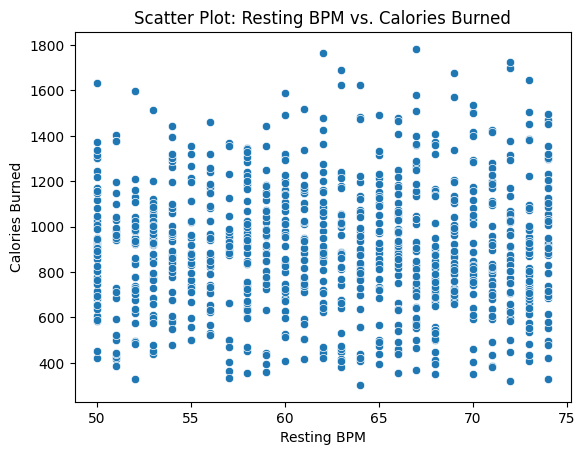

In [ ]:
# Scatter plot vs target
sns.scatterplot(x='Resting_BPM', y='Calories_Burned', data=df)
plt.title('Scatter Plot: Resting BPM vs. Calories Burned')
plt.xlabel('Resting BPM')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# Scale feature
scaler = StandardScaler()
df['Resting_BPM_scaled'] = scaler.fit_transform(df[['Resting_BPM']])

In [ ]:
# Add to Clean_Data
Clean_Data['resting_bpm'] = df['Resting_BPM_scaled']

## **Session_Duration**

In [ ]:
# Rename column : Session_Duration (hours) -> Session_Duration
df.rename(columns={'Session_Duration (hours)': 'Session_Duration'}, inplace=True)

In [ ]:
df['Session_Duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Session_Duration
Non-Null Count  Dtype  
--------------  -----  
973 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [ ]:
df['Session_Duration'].describe()

,Session_Duration
count,973.000000
mean,1.256423
std,0.343033
min,0.500000
25%,1.040000
50%,1.260000
75%,1.460000
max,2.000000


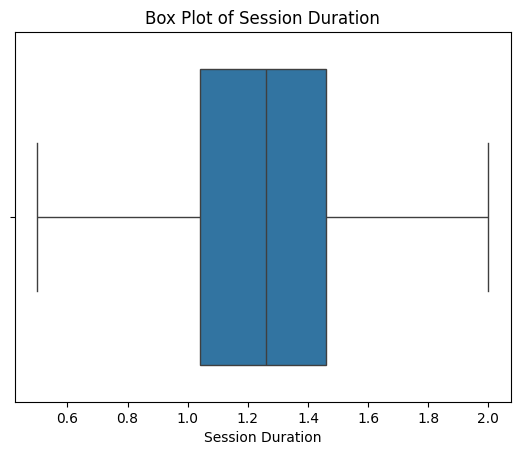

In [ ]:
# Box plot
sns.boxplot(x=df['Session_Duration'])
plt.title('Box Plot of Session Duration')
plt.xlabel('Session Duration')
plt.show()

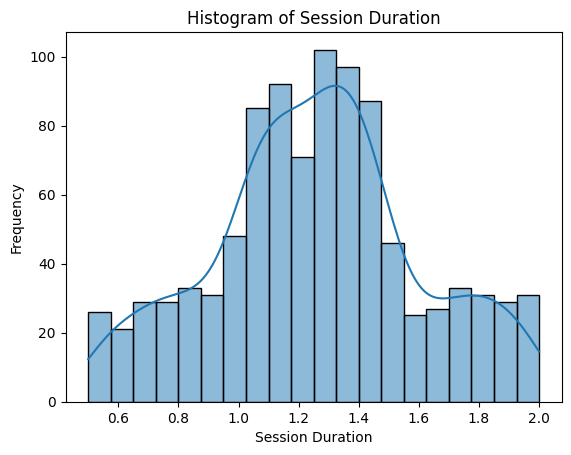

In [ ]:
# Hist plot
sns.histplot(df['Session_Duration'], bins=20, kde=True)
plt.title('Histogram of Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.show()

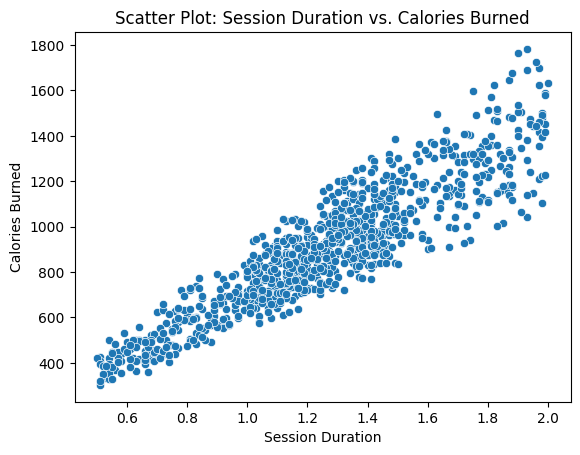

In [ ]:
# scatter plot vs target
sns.scatterplot(x='Session_Duration', y='Calories_Burned', data=df)
plt.title('Scatter Plot: Session Duration vs. Calories Burned')
plt.xlabel('Session Duration')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# Scale feature
scaler = StandardScaler()
df['Session_Duration_scaled'] = scaler.fit_transform(df[['Session_Duration']])

In [ ]:
Clean_Data['Session_Duration'] = df['Session_Duration_scaled']

## **Workout_Type**

In [ ]:
df['Workout_Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Workout_Type
Non-Null Count  Dtype 
--------------  ----- 
973 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [ ]:
df['Workout_Type'].describe()

,Workout_Type
count,973
unique,4
top,Strength
freq,258


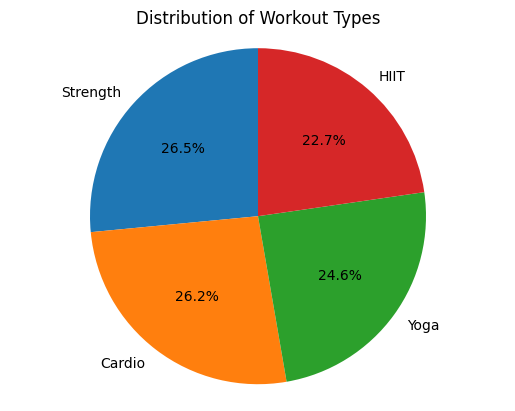

In [ ]:
# Pie plot
workout_counts = df['Workout_Type'].value_counts()
plt.pie(workout_counts, labels=workout_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Workout Types')
plt.axis('equal')
plt.show()

<ipython-input-70-0dbbfbd43284>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, estimator=np.mean, ci=None)


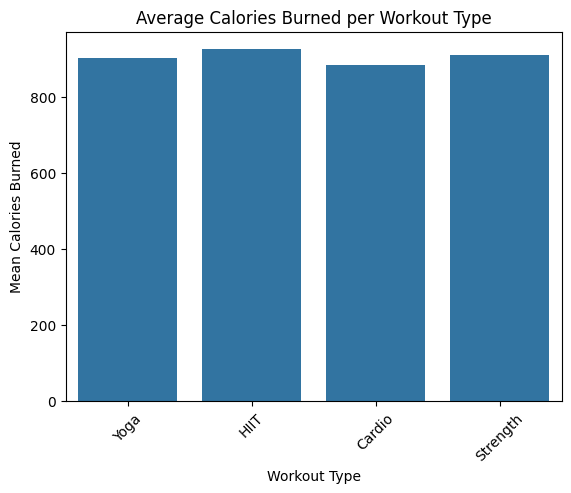

In [ ]:
# Bar plot of mean of Calories_Burned for each category
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, estimator=np.mean, ci=None)
plt.title('Average Calories Burned per Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Mean Calories Burned')
plt.xticks(rotation=45)
plt.show()

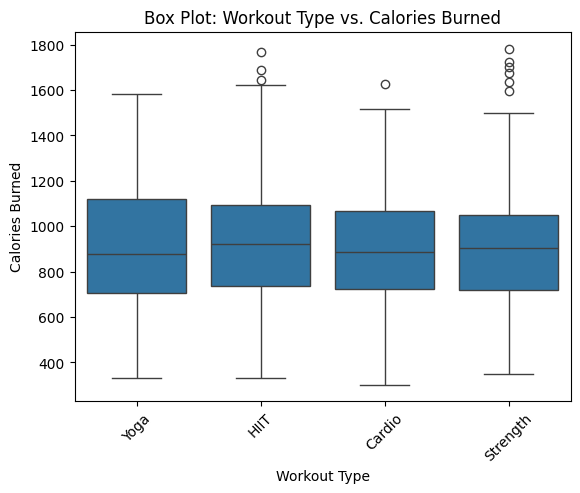

In [ ]:
# Box plot of each category vs target
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Box Plot: Workout Type vs. Calories Burned')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Encode feature
workout_encoded = pd.get_dummies(df['Workout_Type'], prefix='Workout', drop_first= True, dtype = int)

In [ ]:
# Add to Clean_Data
Clean_Data = pd.concat([Clean_Data, workout_encoded], axis=1 )

## **Fat_Percentage**

In [ ]:
df['Fat_Percentage'].describe()

,Fat_Percentage
count,973.000000
mean,24.976773
std,6.259419
min,10.000000
25%,21.300000
50%,26.200000
75%,29.300000
max,35.000000


In [ ]:
df['Fat_Percentage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Fat_Percentage
Non-Null Count  Dtype  
--------------  -----  
973 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


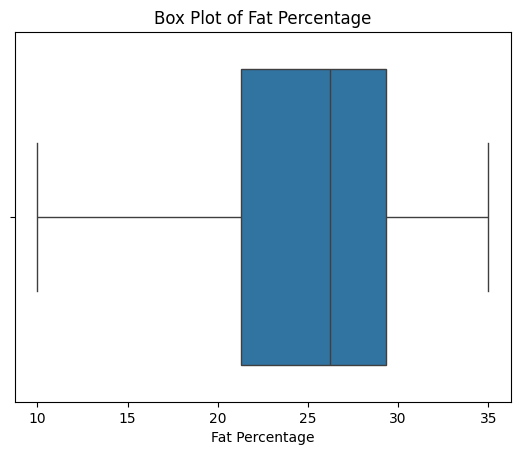

In [ ]:
# Box plot
sns.boxplot(x=df['Fat_Percentage'])
plt.title('Box Plot of Fat Percentage')
plt.xlabel('Fat Percentage')
plt.show()

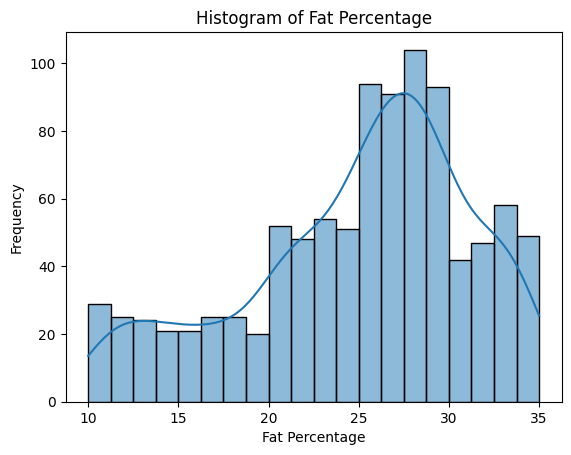

In [ ]:
# Hist plot
sns.histplot(df['Fat_Percentage'], bins=20, kde=True)
plt.title('Histogram of Fat Percentage')
plt.xlabel('Fat Percentage')
plt.ylabel('Frequency')
plt.show()

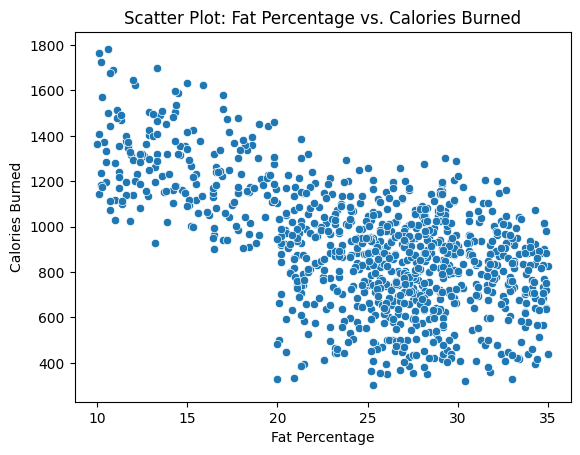

In [ ]:
# Scatter plot vs target
sns.scatterplot(x='Fat_Percentage', y='Calories_Burned', data=df)
plt.title('Scatter Plot: Fat Percentage vs. Calories Burned')
plt.xlabel('Fat Percentage')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# Scale feature
scaler = StandardScaler()
df['Fat_Percentage_scaled'] = scaler.fit_transform(df[['Fat_Percentage']])

In [ ]:
# Add to Clean_Data
Clean_Data['Fat_Percentage'] = df['Fat_Percentage_scaled']

## **Water_Intake**

In [ ]:
# Rename column : Water_Intake (liters) -> Water_Intake
df.rename(columns={'Water_Intake (liters)': 'Water_Intake'}, inplace=True)

In [ ]:
df['Water_Intake'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Water_Intake
Non-Null Count  Dtype  
--------------  -----  
973 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [ ]:
df['Water_Intake'].describe()

,Water_Intake
count,973.000000
mean,2.626619
std,0.600172
min,1.500000
25%,2.200000
50%,2.600000
75%,3.100000
max,3.700000


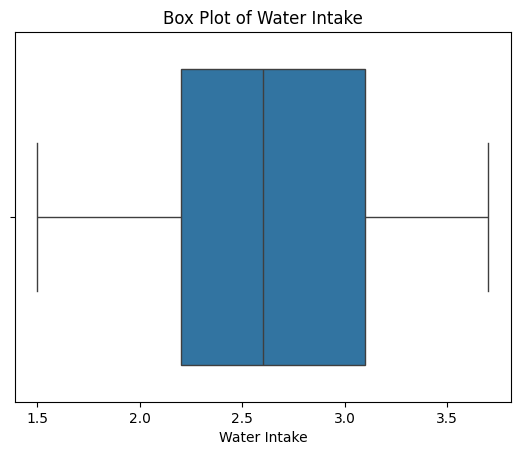

In [ ]:
# Box plot
sns.boxplot(x=df['Water_Intake'])
plt.title('Box Plot of Water Intake')
plt.xlabel('Water Intake')
plt.show()

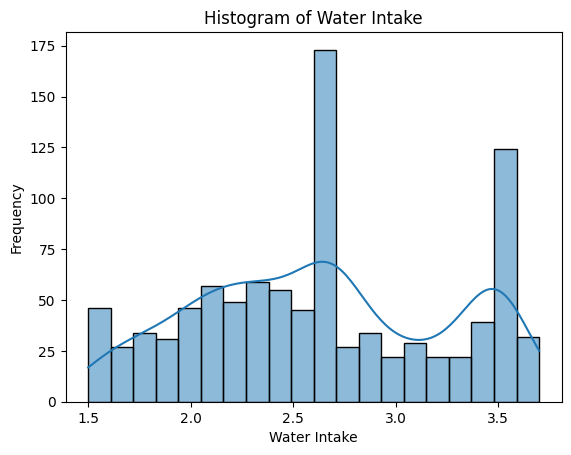

In [ ]:
# Hist plot
sns.histplot(df['Water_Intake'], bins=20, kde=True)
plt.title('Histogram of Water Intake')
plt.xlabel('Water Intake')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Bin the Water_Intake values
bins = np.arange(1.5, 4.1, 0.5)
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]
df['Water_Intake_binned'] = pd.cut(df['Water_Intake'], bins=bins, labels=labels, include_lowest=True)

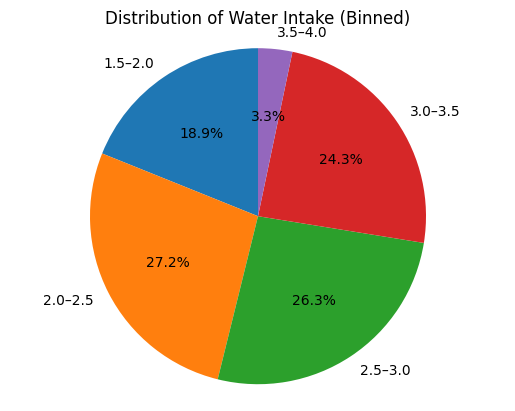

In [ ]:
# pie chart of bins
bin_counts = df['Water_Intake_binned'].value_counts().sort_index()
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Water Intake (Binned)')
plt.axis('equal')
plt.show()

<ipython-input-88-eeefe49f9295>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Water_Intake_binned', y='Calories_Burned', data=df, estimator='mean', ci=None)


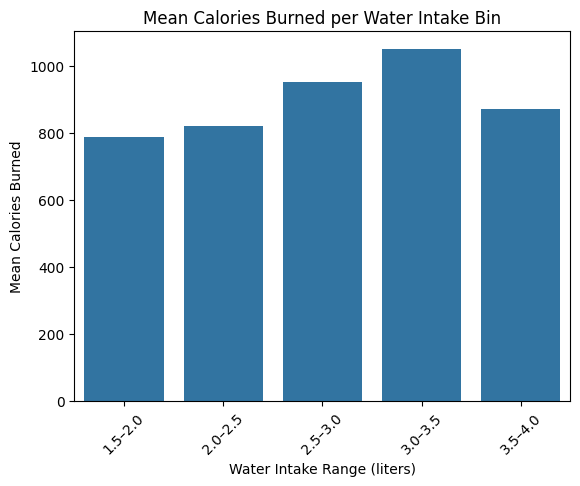

In [ ]:
# bar chart of Mean Calories Burned per Water Intake Bin
sns.barplot(x='Water_Intake_binned', y='Calories_Burned', data=df, estimator=np.mean, ci=None)
plt.title('Mean Calories Burned per Water Intake Bin')
plt.xlabel('Water Intake Range (liters)')
plt.ylabel('Mean Calories Burned')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# ordinal Encoding
encoder = OrdinalEncoder()
df['Water_Intake_ordinal'] = encoder.fit_transform(df[['Water_Intake_binned']])

In [ ]:
# Scale feature
scaler = StandardScaler()
df['Water_Intake_ordinal_scaled'] = scaler.fit_transform(df[['Water_Intake_ordinal']])

In [ ]:
Clean_Data['Water_Intake'] = df['Water_Intake_ordinal_scaled']

## **Workout_Frequency**

In [ ]:
# Rename column : Workout_Frequency (days/week)	 -> Workout_Frequency
df.rename(columns={'Workout_Frequency (days/week)': 'Workout_Frequency'}, inplace=True)

In [ ]:
df['Workout_Frequency'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Workout_Frequency
Non-Null Count  Dtype
--------------  -----
973 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


In [ ]:
df['Workout_Frequency'].describe()

,Workout_Frequency
count,973.000000
mean,3.321686
std,0.913047
min,2.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


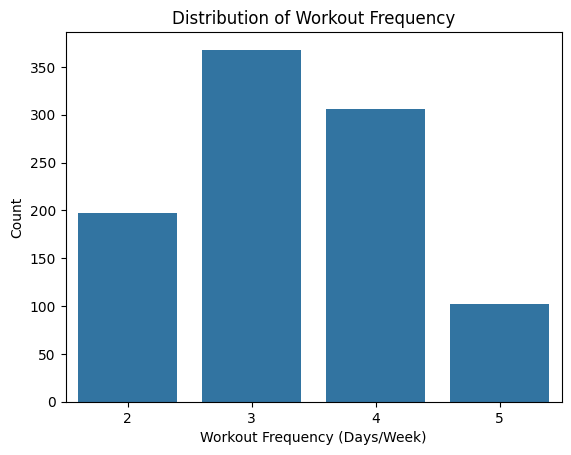

In [ ]:
# Count plot
sns.countplot(x='Workout_Frequency', data=df)
plt.title('Distribution of Workout Frequency')
plt.xlabel('Workout Frequency (Days/Week)')
plt.ylabel('Count')
plt.show()

<ipython-input-96-7501afa93892>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Workout_Frequency', y='Calories_Burned', data=df, estimator='mean', ci=None)


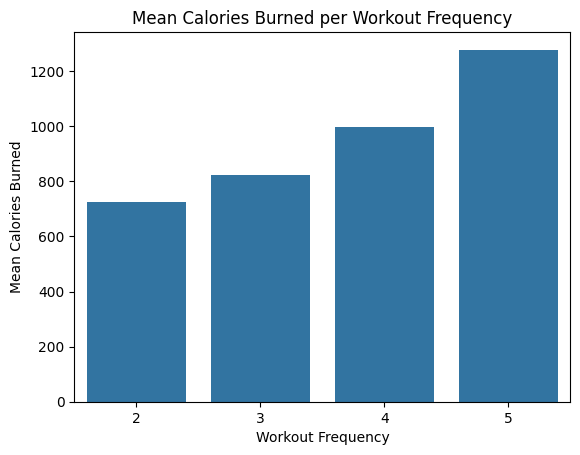

In [ ]:
# bar plot of Mean Calories Burned per Workout Frequency
sns.barplot(x='Workout_Frequency', y='Calories_Burned', data=df, estimator=np.mean, ci=None)
plt.title('Mean Calories Burned per Workout Frequency')
plt.xlabel('Workout Frequency')
plt.ylabel('Mean Calories Burned')
plt.show()

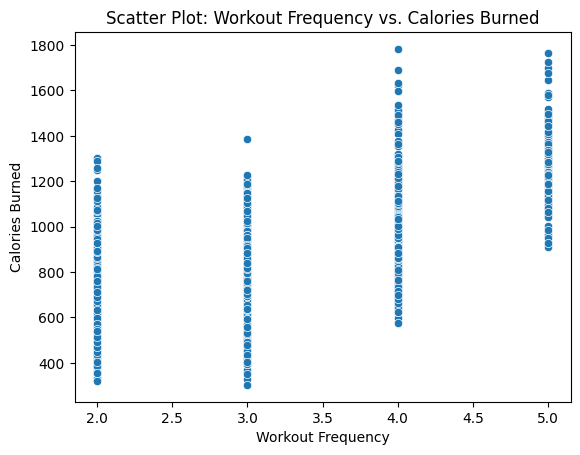

In [ ]:
# Scatter plot vs target
sns.scatterplot(x='Workout_Frequency', y='Calories_Burned', data=df)
plt.title('Scatter Plot: Workout Frequency vs. Calories Burned')
plt.xlabel('Workout Frequency')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# Feature scale
scaler = StandardScaler()
df['Workout_Frequency_scaled'] = scaler.fit_transform(df[['Workout_Frequency']])

In [ ]:
# Add to Clean_Data
Clean_Data['Workout_Frequency_scaled'] = df['Workout_Frequency_scaled']

## **Experience_Level**

In [ ]:
df['Experience_Level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Experience_Level
Non-Null Count  Dtype
--------------  -----
973 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


In [ ]:
df['Experience_Level'].describe()

,Experience_Level
count,973.000000
mean,1.809866
std,0.739693
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


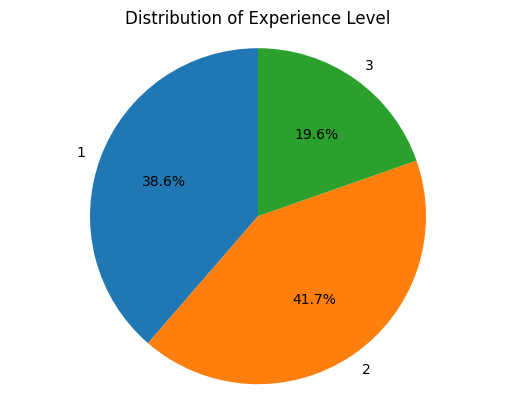

In [ ]:
# Pie chart
experience_counts = df['Experience_Level'].value_counts().sort_index()
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Experience Level')
plt.axis('equal')
plt.show()

<ipython-input-103-bf962072a15a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Experience_Level', y='Calories_Burned', data=df, estimator='mean', ci=None)


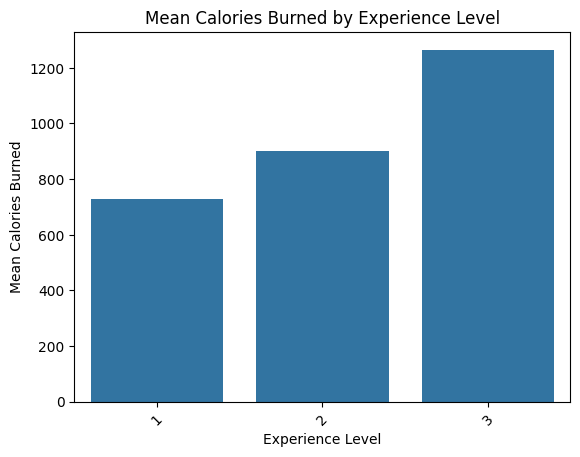

In [ ]:
# Bar plot of Mean Calories Burned by Experience Level
sns.barplot(x='Experience_Level', y='Calories_Burned', data=df, estimator='mean', ci=None)
plt.title('Mean Calories Burned by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Mean Calories Burned')
plt.xticks(rotation=45)
plt.show()

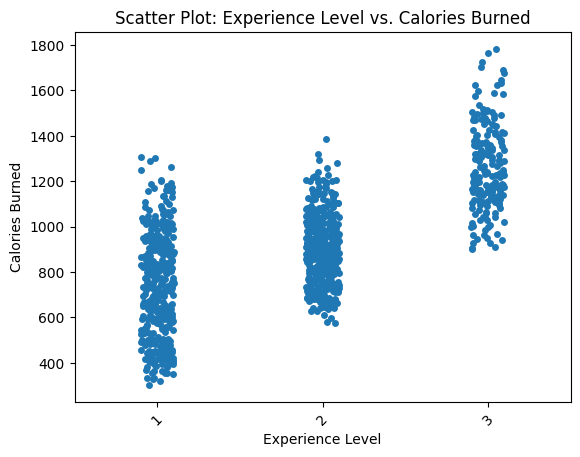

In [ ]:
# Scatter plot
sns.stripplot(x='Experience_Level', y='Calories_Burned', data=df, jitter=True)
plt.title('Scatter Plot: Experience Level vs. Calories Burned')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Scale feature
scaler = StandardScaler()
df['Experience_Level_scaled'] = scaler.fit_transform(df[['Experience_Level']])

In [ ]:
# Add to Clean_Data
Clean_Data['Experience_Level_scaled'] = df['Experience_Level_scaled']

## **BMI**

In [ ]:
df['BMI'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: BMI
Non-Null Count  Dtype  
--------------  -----  
973 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [ ]:
df['BMI'].describe()

,BMI
count,973.000000
mean,24.912127
std,6.660879
min,12.320000
25%,20.110000
50%,24.160000
75%,28.560000
max,49.840000


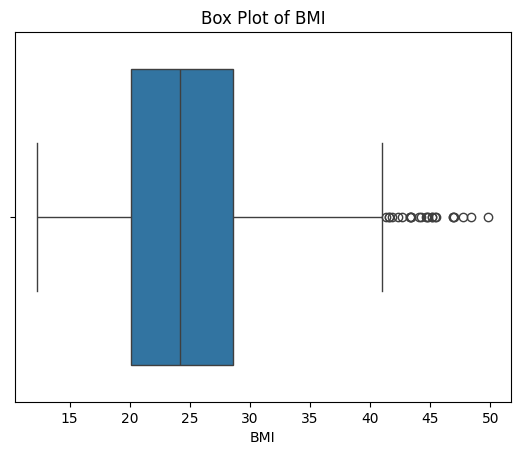

In [ ]:
# Box plot
sns.boxplot(x=df['BMI'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

In [ ]:
# Replace upper outliers with Q95
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


Q95 = df['BMI'].quantile(0.95)

df['BMI'] = np.where(df['BMI'] > upper_bound, Q95, df['BMI'])

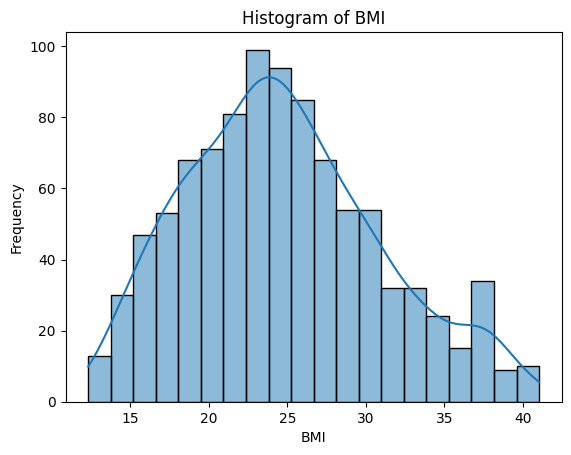

In [ ]:
# Hist plot
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


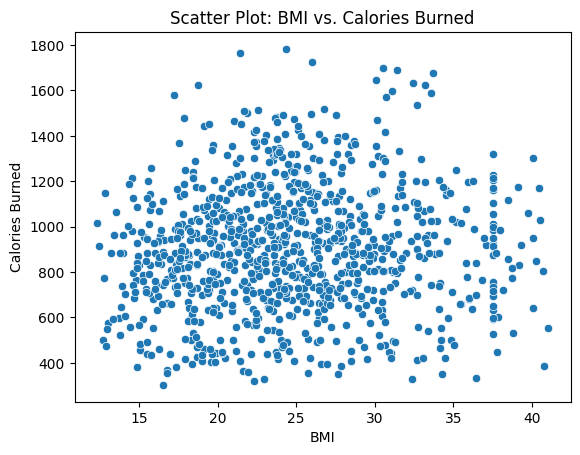

In [ ]:
# Scatter plot vs target
sns.scatterplot(x='BMI', y='Calories_Burned', data=df)
plt.title('Scatter Plot: BMI vs. Calories Burned')
plt.xlabel('BMI')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
# feature scale
scaler = StandardScaler()
df['BMI_scaled'] = scaler.fit_transform(df[['BMI']])

In [ ]:
# Add to clean data
Clean_Data['BMI_scaled'] = df['BMI_scaled']

## **Correlations**

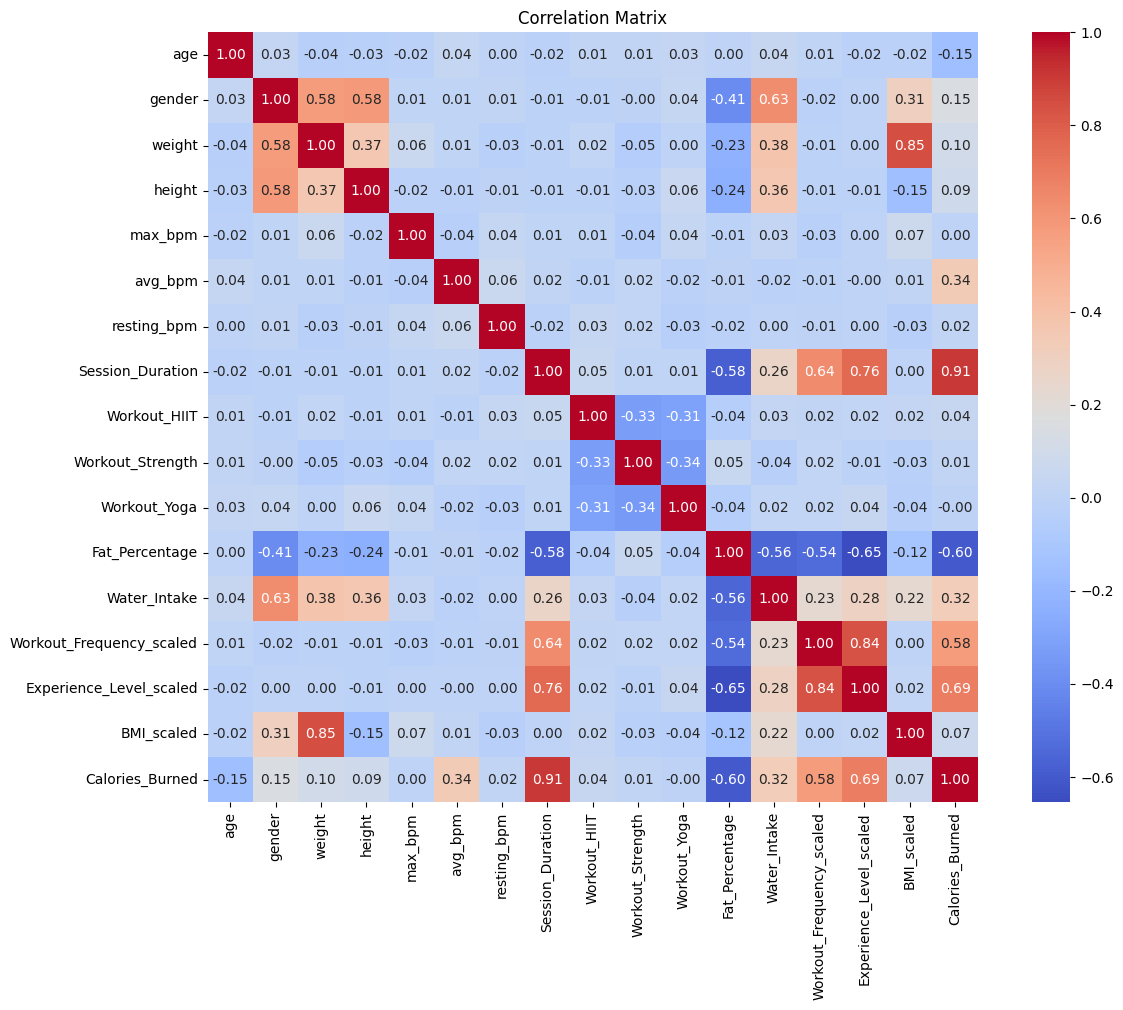

In [ ]:
# Compute correlation matrix
Clean_Data['Calories_Burned'] = df['Calories_Burned']

correlation_matrix = Clean_Data.corr()

# Heatmap for visualization
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Identify highly correlated features

# Remove the target column from correlation check
corr_matrix_no_target = Clean_Data.drop(columns='Calories_Burned').corr()

high_corr_pairs = []

# Iterate over the matrix to extract high correlation pairs
for i in range(len(corr_matrix_no_target.columns)):
    for j in range(i):
        corr_value = corr_matrix_no_target.iloc[i, j]
        if abs(corr_value) > 0.85:
            col1 = corr_matrix_no_target.columns[i]
            col2 = corr_matrix_no_target.columns[j]
            high_corr_pairs.append((col1, col2, corr_value))

# Print highly correlated pairs
print("Highly correlated feature pairs (|corr| > 0.85):")
for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]} => Correlation: {pair[2]:.2f}")


Highly correlated feature pairs (|corr| > 0.85):
BMI_scaled & weight => Correlation: 0.85


In [ ]:
#  Drop one of two highly correlated features — keep the one more correlated with target
full_corr = Clean_Data.corr()

to_drop = set()

for f1, f2, _ in high_corr_pairs:
    corr_f1_target = abs(full_corr.loc[f1, 'Calories_Burned'])
    corr_f2_target = abs(full_corr.loc[f2, 'Calories_Burned'])

    if corr_f1_target >= corr_f2_target:
        to_drop.add(f2)
    else:
        to_drop.add(f1)

print("Dropping these features due to high correlation with other features and lower correlation with target:")
print(to_drop)

# Drop the selected features
Clean_Data_dropped = Clean_Data.drop(columns=to_drop)

Dropping these features due to high correlation with other features and lower correlation with target:
{'BMI_scaled'}


In [ ]:
Clean_Data

,age,gender,weight,height,max_bpm,avg_bpm,resting_bpm,Session_Duration,Workout_HIIT,Workout_Strength,Workout_Yoga,Fat_Percentage,Water_Intake,Workout_Frequency_scaled,Experience_Level_scaled,BMI_scaled,Calories_Burned
0,1.422343,1,0.682657,-0.098545,0.010081,0.922970,-0.303555,1.264598,0,0,1,-1.978321,1.183729,0.743295,1.609784,0.883891,1313.0
1,0.600965,0,0.049792,-1.508604,-0.076726,0.504494,0.515749,0.127098,1,0,0,1.426301,-0.580081,0.743295,0.257176,1.174778,883.0
2,-0.548964,0,-0.271364,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,0,0,0,1.346380,-0.580081,0.743295,0.257176,-0.003313,677.0
3,-1.123928,1,-0.975072,-0.176881,0.878155,1.411193,-0.849757,-1.943735,0,1,0,0.611110,-0.580081,-0.352502,-1.095432,-1.021417,532.0
4,-0.056137,1,-1.310397,0.528148,0.704540,0.992716,0.788850,-1.797902,0,1,0,0.675047,0.301824,-0.352502,-1.095432,-1.671064,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,1,0.625982,0.136465,0.617733,0.992716,0.652299,0.914598,0,1,0,-2.393908,1.183729,0.743295,1.609784,0.652798,1364.0
969,-1.123928,1,-0.342207,-0.881911,0.357311,1.550685,-0.849757,0.360432,0,1,0,0.003713,0.301824,-1.448299,-1.095432,0.155058,1260.0
970,1.668756,0,-0.635025,0.293138,1.225384,-1.657634,-1.259409,1.352098,0,0,0,-0.987304,0.301824,1.839092,1.609784,-0.845269,929.0
971,-0.548964,1,2.482073,0.841495,1.572614,0.155764,-0.030454,-0.456235,1,0,0,0.515205,-0.580081,-0.352502,0.257176,2.102384,883.0


# **Train and Evaluation**

In [ ]:
# Split Cleaned Data
X = Clean_Data.drop(columns='Calories_Burned')
y = Clean_Data['Calories_Burned']

# Split the data: 70% train+eval, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=21
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Training set size: 681 samples
Testing set size: 292 samples


In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [10, 20, None],
}
# Metrics
scoring = {
    'R2': make_scorer(r2_score),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Initialize model
rf = RandomForestRegressor(random_state=21, n_jobs=-1)

# Grid Search
rf_grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='R2',
                           return_train_score=False,
                           cv=5)

rf_grid_search.fit(X_train, y_train)

# Results
results = rf_grid_search.cv_results_
summary_data = []
for i, params in enumerate(results['params']):
    summary_data.append({
        'Model': f"model_{i+1}",
        'Params': params,
        'Mean R2': results['mean_test_R2'][i],
        'Mean MAE': -results['mean_test_MAE'][i]
    })

results_df = pd.DataFrame(summary_data)
results_df.index = results_df['Model']
results_df = results_df.drop(columns='Model')

In [ ]:
print(results_df[['Mean R2', 'Mean MAE']])

# Best models
best_r2_index = results_df['Mean R2'].idxmax()
best_mae_index = results_df['Mean MAE'].idxmin()

print(f"\nBest model based on R2: {best_r2_index}")
print(f"Parameters: {results_df.loc[best_r2_index, 'Params']}")
print(f"Mean R2: {results_df.loc[best_r2_index, 'Mean R2']:.4f}")

print(f"\nBest model based on MAE: {best_mae_index}")
print(f"Parameters: {results_df.loc[best_mae_index, 'Params']}")
print(f"Mean MAE: {results_df.loc[best_mae_index, 'Mean MAE']:.4f}")

          Mean R2   Mean MAE
Model                       
model_1  0.965708  39.933707
model_2  0.966065  39.250641
model_3  0.965740  39.950143
model_4  0.965959  39.346981
model_5  0.965740  39.950143
model_6  0.965958  39.348052

Best model based on R2: model_2
Parameters: {'max_depth': 10, 'n_estimators': 500}
Mean R2: 0.9661

Best model based on MAE: model_2
Parameters: {'max_depth': 10, 'n_estimators': 500}
Mean MAE: 39.2506


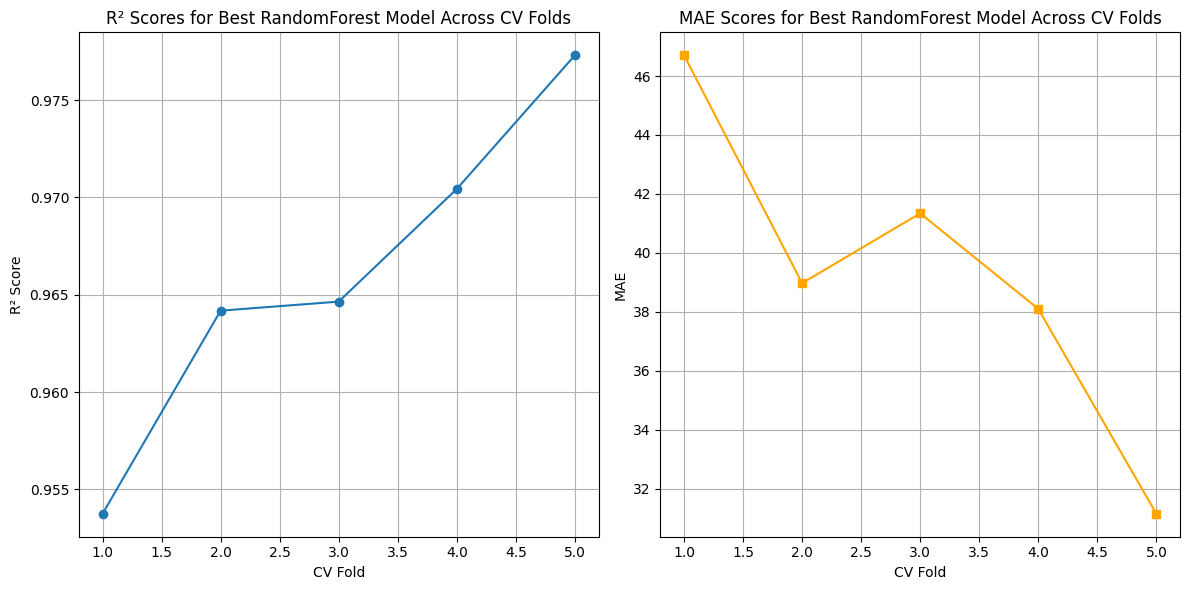

In [ ]:
# Get the index of the best model
best_index = rf_grid_search.best_index_

# Number of folds
cv_splits = rf_grid_search.cv


r2_scores = [results[f'split{i}_test_R2'][best_index] for i in range(cv_splits)]
mae_scores = [-results[f'split{i}_test_MAE'][best_index] for i in range(cv_splits)]  # make MAE positive again

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# R² plot
axes[0].plot(range(1, cv_splits + 1), r2_scores, marker='o', linestyle='-')
axes[0].set_title('R² Scores for Best RandomForest Model Across CV Folds')
axes[0].set_xlabel('CV Fold')
axes[0].set_ylabel('R² Score')
axes[0].grid(True)

# MAE plot
axes[1].plot(range(1, cv_splits + 1), mae_scores, marker='s', linestyle='-', color='orange')
axes[1].set_title('MAE Scores for Best RandomForest Model Across CV Folds')
axes[1].set_xlabel('CV Fold')
axes[1].set_ylabel('MAE')
axes[1].grid(True)

plt.tight_layout()
plt.show()

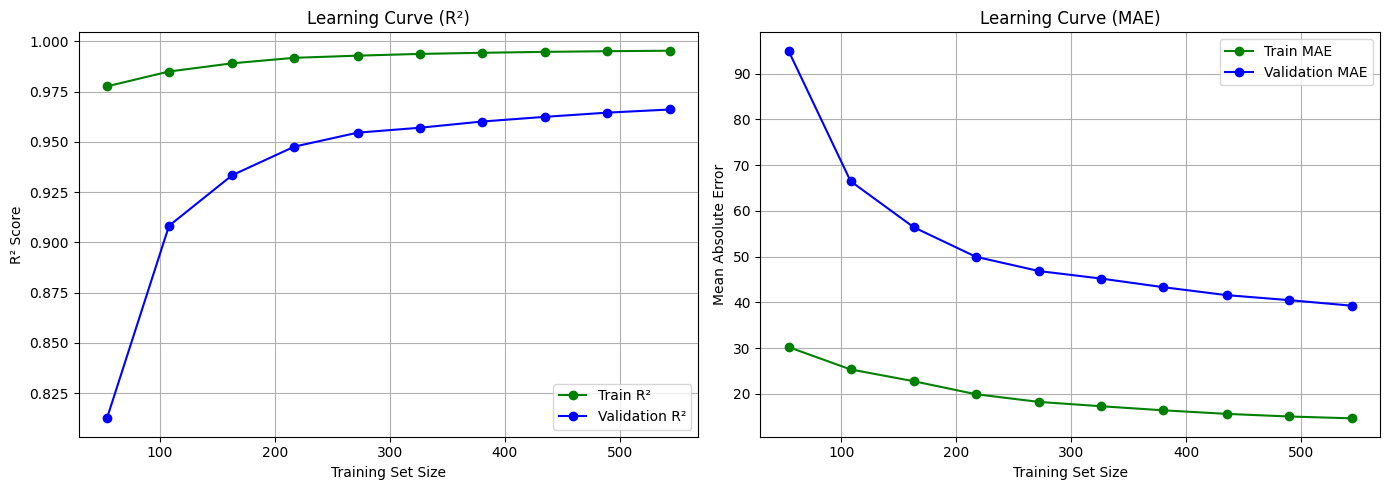

In [ ]:

best_params = rf_grid_search.best_params_
model = RandomForestRegressor(**best_params, random_state=21)


r2_scorer = make_scorer(r2_score)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

#  Compute learning curves

# R²
train_sizes, train_r2, val_r2 = learning_curve(
    model, X_train, y_train,
    cv=5,
    scoring=r2_scorer,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# MAE
_, train_mae, val_mae = learning_curve(
    model, X_train, y_train,
    cv=5,
    scoring=mae_scorer,
    train_sizes=train_sizes,
    n_jobs=-1
)

train_mae = -train_mae
val_mae = -val_mae

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Curve
axes[0].plot(train_sizes, train_r2.mean(axis=1), 'g-o', label='Train R²')   # green line with circles
axes[0].plot(train_sizes, val_r2.mean(axis=1), 'b-o', label='Validation R²')  # blue line with circles
axes[0].set_title("Learning Curve (R²)")
axes[0].set_xlabel("Training Set Size")
axes[0].set_ylabel("R² Score")
axes[0].legend()
axes[0].grid(True)

# MAE Curve
axes[1].plot(train_sizes, train_mae.mean(axis=1), 'g-o', label='Train MAE')
axes[1].plot(train_sizes, val_mae.mean(axis=1), 'b-o', label='Validation MAE')
axes[1].set_title("Learning Curve (MAE)")
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Mean Absolute Error")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# Pipeline: PolynomialFeatures -> Ridge
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=True)),
    ('ridge', Ridge())
])

# Grid search
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5, 6],
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# Metrics
scoring = {
    'R2': make_scorer(r2_score),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='R2',
    cv=5,
    return_train_score=False
)

grid_search.fit(X_train, y_train)

results = grid_search.cv_results_
summary_data = []

for i, params in enumerate(results['params']):
    summary_data.append({
        'Model': f"model_{i+1}",
        'Mean R2': results['mean_test_R2'][i],
        'Mean MAE': -results['mean_test_MAE'][i],
        'Degree': params['poly__degree'],
        'Alpha': params['ridge__alpha']
    })

results_df = pd.DataFrame(summary_data).set_index('Model')

In [ ]:
print(results_df)

# Best models
best_r2_index = results_df['Mean R2'].idxmax()
best_mae_index = results_df['Mean MAE'].idxmin()

print(f"\nBest model based on R²: {best_r2_index}")
print(results_df.loc[best_r2_index])

print(f"\nBest model based on MAE: {best_mae_index}")
print(results_df.loc[best_mae_index])

           Mean R2    Mean MAE  Degree   Alpha
Model                                         
model_1   0.978533   30.963163       1    0.01
model_2   0.978533   30.957880       1    0.10
model_3   0.978525   30.910260       1    1.00
model_4   0.977528   31.105835       1   10.00
model_5   0.944610   50.344955       1  100.00
model_6   0.988766   23.405857       2    0.01
model_7   0.988958   23.228517       2    0.10
model_8   0.989318   22.886432       2    1.00
model_9   0.987982   23.784438       2   10.00
model_10  0.958200   44.651637       2  100.00
model_11  0.899479   66.854406       3    0.01
model_12  0.907390   64.202729       3    0.10
model_13  0.933229   54.152967       3    1.00
model_14  0.951755   45.723563       3   10.00
model_15  0.956081   44.573588       3  100.00
model_16  0.864655   71.751881       4    0.01
model_17  0.865094   71.657689       4    0.10
model_18  0.868915   70.823033       4    1.00
model_19  0.885742   67.304346       4   10.00
model_20  0.9

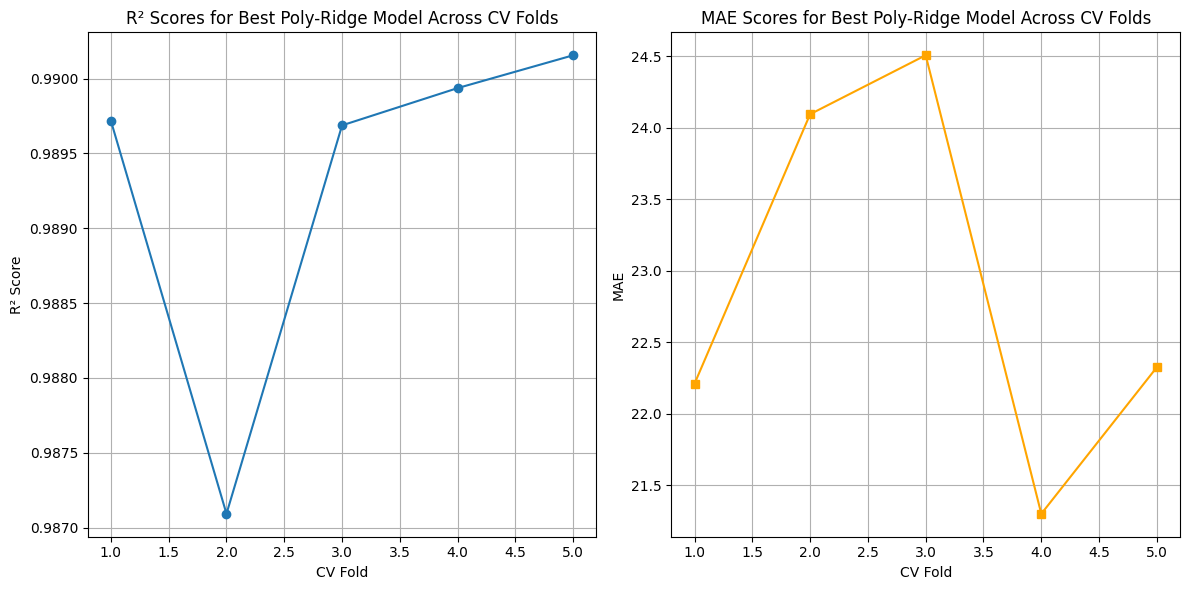

In [ ]:

best_index = grid_search.best_index_
cv_splits = grid_search.cv

r2_scores = [results[f'split{i}_test_R2'][best_index] for i in range(cv_splits)]
mae_scores = [-results[f'split{i}_test_MAE'][best_index] for i in range(cv_splits)]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# R² subplot
axes[0].plot(range(1, cv_splits + 1), r2_scores, marker='o', linestyle='-')
axes[0].set_title('R² Scores for Best Poly-Ridge Model Across CV Folds')
axes[0].set_xlabel('CV Fold')
axes[0].set_ylabel('R² Score')
axes[0].grid(True)

# MAE subplot
axes[1].plot(range(1, cv_splits + 1), mae_scores, marker='s', linestyle='-', color='orange')
axes[1].set_title('MAE Scores for Best Poly-Ridge Model Across CV Folds')
axes[1].set_xlabel('CV Fold')
axes[1].set_ylabel('MAE')
axes[1].grid(True)

plt.tight_layout()
plt.show()

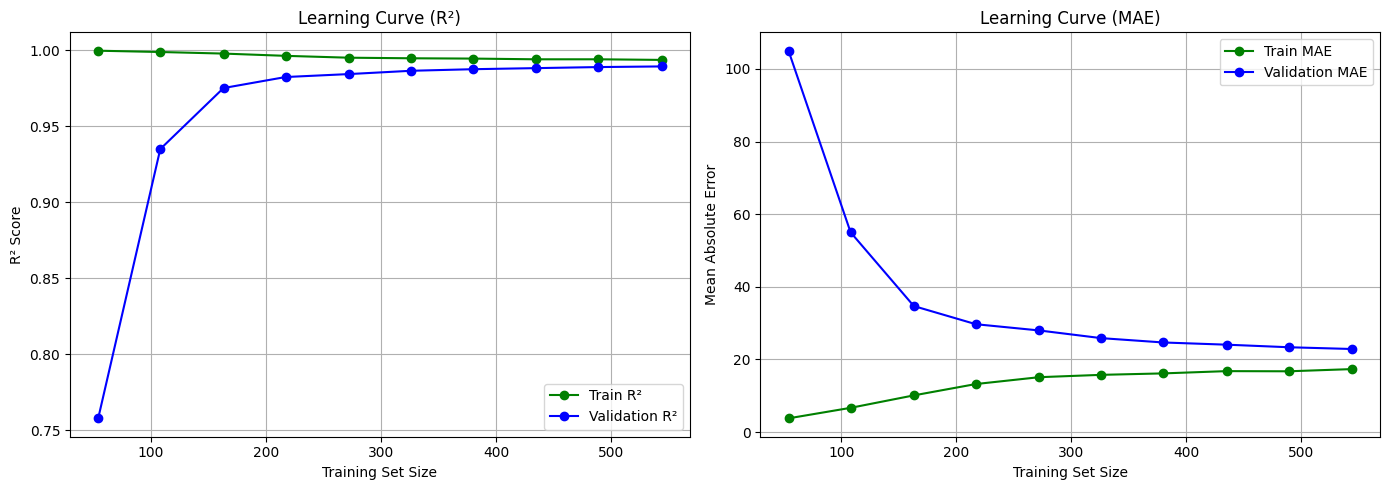

In [ ]:
best_params = grid_search.best_params_

best_model = Pipeline([
    ('poly', PolynomialFeatures(degree=best_params['poly__degree'], include_bias=False)),
    ('ridge', Ridge(alpha=best_params['ridge__alpha']))
])


r2_scorer = make_scorer(r2_score)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Learning curve for R²
train_sizes, train_r2, val_r2 = learning_curve(
    best_model, X_train, y_train,
    cv=5,
    scoring=r2_scorer,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Learning curve for MAE
_, train_mae, val_mae = learning_curve(
    best_model, X_train, y_train,
    cv=5,
    scoring=mae_scorer,
    train_sizes=train_sizes,
    n_jobs=-1
)

train_mae = -train_mae
val_mae = -val_mae

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² subplot
axes[0].plot(train_sizes, train_r2.mean(axis=1), 'g-o', label='Train R²')
axes[0].plot(train_sizes, val_r2.mean(axis=1), 'b-o', label='Validation R²')
axes[0].set_title("Learning Curve (R²)")
axes[0].set_xlabel("Training Set Size")
axes[0].set_ylabel("R² Score")
axes[0].legend()
axes[0].grid(True)

# MAE subplot
axes[1].plot(train_sizes, train_mae.mean(axis=1), 'g-o', label='Train MAE')
axes[1].plot(train_sizes, val_mae.mean(axis=1), 'b-o', label='Validation MAE')
axes[1].set_title("Learning Curve (MAE)")
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Mean Absolute Error")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


                     Feature  Importance  Correlation
7           Session_Duration    0.834560     0.910705
5                    avg_bpm    0.103000     0.345259
0                        age    0.021693    -0.141614
11            Fat_Percentage    0.011645    -0.616028
2                     weight    0.006549     0.103064
1                     gender    0.006230     0.152095
3                     height    0.004236     0.087476
15                BMI_scaled    0.003294     0.073365
4                    max_bpm    0.002358     0.017125
6                resting_bpm    0.002335     0.030668
12              Water_Intake    0.001529     0.340450
13  Workout_Frequency_scaled    0.000770     0.600477
14   Experience_Level_scaled    0.000518     0.712523
9           Workout_Strength    0.000504     0.012434
10              Workout_Yoga    0.000436    -0.000605
8               Workout_HIIT    0.000342     0.020665


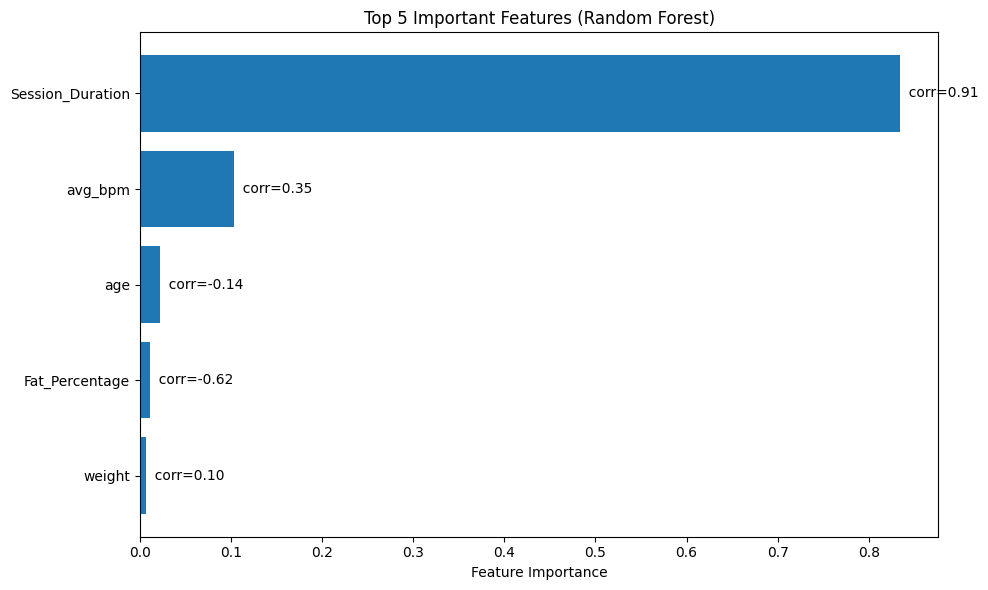

In [ ]:
# Feature importances by randomforest
best_rf_params = rf_grid_search.best_params_
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=21)
best_rf_model.fit(X_train, y_train)


importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Correlation with target
correlations = X_train.corrwith(y_train)

# Create DataFrame with importance and correlation
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Correlation': correlations.values
}).sort_values(by='Importance', ascending=False)

# Show top features
print(importance_df)

# Plot top N features
top_n = 5
top_df = importance_df.head(top_n).iloc[::-1]

plt.figure(figsize=(10, 6))
bars = plt.barh(top_df['Feature'], top_df['Importance'])
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Important Features (Random Forest)")

# Annotate bars with correlation
for bar, corr in zip(bars, top_df['Correlation']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"  corr={corr:.2f}", va='center')

plt.tight_layout()
plt.show()

In [ ]:
# statsmodel
X = Clean_Data.drop(columns='Calories_Burned')
y = Clean_Data['Calories_Burned']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2833.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        11:34:31   Log-Likelihood:                -4949.3
No. Observations:                 973   AIC:                             9933.
Df Residuals:                     956   BIC:                         1.002e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   